In [183]:
#Importing the modules I need
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
df = pd.read_excel('AnalystAuthorTest_SuicideData Oct 2018.xls', sheet_name='Data')

In [185]:
#checking the number of unique entries
df['MethodOfSuicide'].unique()

array(['Hanging, strangulation and suffocation', 'Submersion (drowning) ',
       'Poisoning – solids and liquids', 'Poisoning – gases and vapours',
       'Firearms and explosives ', 'Other means'], dtype=object)

In [186]:
df[df['RegYear'] == 2007]['MethodOfSuicide'].value_counts(sort = False)['Poisoning – gases and vapours']

72

In [187]:
year = np.arange(2000,2012)

In [188]:
year

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011])

In [189]:
#Setting up the data for my data frame
#I did this manually instead of using 2 for loops because it would be faster
#as there are only 6 unique entries.
#This just checks how many suicides there were by what method each year
hanging = []
drowning = []
solids = []
gases = []
explosives = []
other = []
for item in year:
    hanging.append(df[df['RegYear'] == item]['MethodOfSuicide'].value_counts(sort = False)['Hanging, strangulation and suffocation'])
    drowning.append(df[df['RegYear'] == item]['MethodOfSuicide'].value_counts(sort = False)['Submersion (drowning) '])
    solids.append(df[df['RegYear'] == item]['MethodOfSuicide'].value_counts(sort = False)['Poisoning – solids and liquids'])
    gases.append(df[df['RegYear'] == item]['MethodOfSuicide'].value_counts(sort = False)['Poisoning – gases and vapours'])
    explosives.append(df[df['RegYear'] == item]['MethodOfSuicide'].value_counts(sort = False)['Firearms and explosives '])
    other.append(df[df['RegYear'] == item]['MethodOfSuicide'].value_counts(sort = False)['Other means'])


In [190]:
data = {'Hanging, strangulation and suffocation':hanging,
        'Submersion (drowning)':drowning,
        'Poisoning – solids and liquids':solids,
        'Poisoning – gases and vapours':gases,
        'Firearms and explosives':explosives,
        'Other means':other,
        'Year':year
}

In [191]:
new_df = pd.DataFrame(data = data)

In [192]:
new_df.set_index('Year', inplace = True)

In [193]:
#Here I re-order the columns in a more readible way
new_df.reindex(columns = ['Hanging, strangulation and suffocation',
                          'Poisoning – gases and vapours',
                          'Poisoning – solids and liquids',
                          'Firearms and explosives',
                          'Submersion (drowning)',
                          'Other means'
                         ])

,"Hanging, strangulation and suffocation",Poisoning – gases and vapours,Poisoning – solids and liquids,Firearms and explosives,Submersion (drowning),Other means
Year,,,,,,
2000,215,113,36,37,15,43
2001,235,111,54,51,7,50
2002,222,99,47,49,13,40
2003,250,104,58,42,13,55
2004,270,95,46,39,12,32
2005,256,110,51,44,13,41
2006,286,87,49,48,9,45
2007,284,72,48,48,11,38
2008,290,75,55,42,8,48


In [194]:
color_pal = ["#9b59b6","#2ecc71", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]

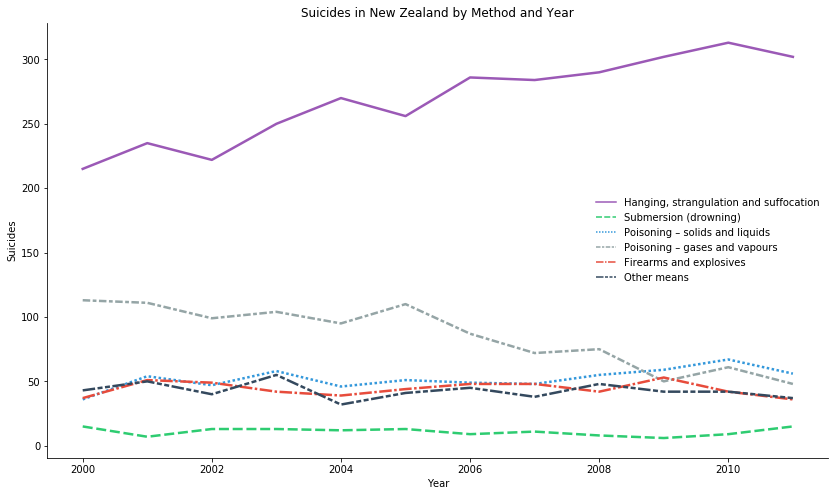

In [195]:
#Creating the figure
fig = plt.figure(figsize = (14, 8))

sns.set_context(font_scale = 3)
sns.lineplot(data=new_df, palette = color_pal, linewidth = 2.5,)
sns.despine()

plt.ylabel("Suicides")
plt.title("Suicides in New Zealand by Method and Year")
plt.legend(frameon = False)
plt.savefig('SuicideFigure.png')

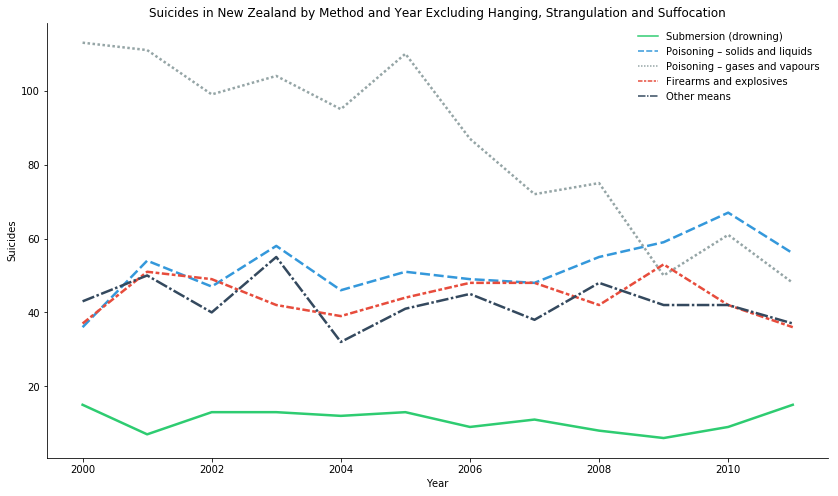

In [196]:
fig = plt.figure(figsize = (14, 8))

sns.set_context(font_scale = 3)
sns.lineplot(data=new_df.drop(['Hanging, strangulation and suffocation'], axis = 1), 
             palette = color_pal[1:], linewidth = 2.5,)
sns.despine()

plt.ylabel("Suicides")
plt.title("Suicides in New Zealand by Method and Year Excluding Hanging, Strangulation and Suffocation")
plt.legend(frameon = False)
plt.savefig('SuicideFigure Excluding Hanging.png')

In [15]:
#Addings totals to my dataframe after I made the graphs.
new_df['Total'] = new_df['Hanging, strangulation and suffocation'] + new_df['Poisoning – gases and vapours'] + new_df['Poisoning – solids and liquids'] +new_df['Firearms and explosives'] +new_df['Submersion (drowning)'] +new_df['Other means']

In [16]:
new_df

,"Hanging, strangulation and suffocation",Submersion (drowning),Poisoning – solids and liquids,Poisoning – gases and vapours,Firearms and explosives,Other means,Total
Year,,,,,,,
2000,215,15,36,113,37,43,459
2001,235,7,54,111,51,50,508
2002,222,13,47,99,49,40,470
2003,250,13,58,104,42,55,522
2004,270,12,46,95,39,32,494
2005,256,13,51,110,44,41,515
2006,286,9,49,87,48,45,524
2007,284,11,48,72,48,38,501
2008,290,8,55,75,42,48,518


In [17]:
total_deaths = df.groupby('MethodOfSuicide').count()

In [18]:
total_deaths = 6051

In [19]:
totals_df = df.groupby('MethodOfSuicide').count()

In [20]:
totals_df.drop('CauseOfDeath', axis = 1, inplace = True)

In [21]:
#Here I get a nice dataframe set up
#with the index as method
totals_df

,RegYear
MethodOfSuicide,
Firearms and explosives,531
"Hanging, strangulation and suffocation",3225
Other means,513
Poisoning – gases and vapours,1025
Poisoning – solids and liquids,626
Submersion (drowning),131


In [22]:
totals_df.rename(columns = {'RegYear': 'Deaths'}, inplace=True)

In [23]:
totals_df.sort_values(by = 'Deaths', ascending=False, inplace = True)

In [26]:
totals_df['Percent Since 2000'] = round((totals_df['Deaths']/6051)*100, 2)

In [28]:
totals_df.drop('Percent', axis = 1, inplace = True)

In [33]:
new_df['Year'] = year

In [37]:
df.drop('CauseOfDeath', axis = 1, inplace = True)

In [47]:
df[df['RegYear'] > 2004].groupby('MethodOfSuicide').count()['RegYear']['Other means']

293

In [75]:
method_list = ['Hanging, strangulation and suffocation',
'Poisoning – gases and vapours',
'Poisoning – solids and liquids',
'Firearms and explosives',
'Other means',
'Submersion (drowning)']

In [60]:
round(100*(new_df[new_df['Year'] > 2004]['Hanging, strangulation and suffocation'].sum()/df[df['RegYear'] > 2004].count()[0]),2)

56.50361311839911

In [100]:
#This code checks a year, then compiles the percent deaths 
#by method and year. Giving it a year to check manually.
year_to_check = 2004
totals_year_values = []
for item in method_list:
    totals_year_values.append(round(100*(new_df[new_df['Year'] > (year_to_check-1)][item].sum()/df[df['RegYear'] > (year_to_check-1)].count()[0]),2))

print(totals_year_values)

totals_df_updated['% Deaths ' + str(year_to_check) + ' to 2011'] = totals_year_values

[56.28, 14.61, 10.53, 8.6, 7.94, 2.03]


In [84]:
totals_df.drop('Deaths', axis = 1, inplace = True)

In [92]:
totals_df.rename(columns={'Percent Since 2000':'% Deaths 2000 to 2011',
                          'Percentage Since 2005':'% Deaths 2005 to 2011',
                          'Percentage Since 2010':'% Deaths 2010 to 2011'})

,% Deaths 2000 to 2011,% Deaths 2005 to 2011,% Deaths 2010 to 2011
MethodOfSuicide,,,
"Hanging, strangulation and suffocation",53.30,56.50,59.82
Poisoning – gases and vapours,16.94,13.98,10.60
Poisoning – solids and liquids,10.35,10.70,11.96
Firearms and explosives,8.78,8.70,7.59
Other means,8.48,8.14,7.68
Submersion (drowning),2.16,1.97,2.33


In [102]:
totals_df_updated = pd.DataFrame()

In [107]:
year_to_check = 2008
totals_year_values = []
for item in method_list:
    totals_year_values.append(round(100*(new_df[new_df['Year'] > (year_to_check-1)][item].sum()/df[df['RegYear'] > (year_to_check-1)].count()[0]),2))

print(totals_year_values)

totals_df_updated['% Deaths ' + str(year_to_check) + ' to 2011'] = totals_year_values
totals_df_updated

[58.65, 11.37, 11.52, 8.41, 8.21, 1.85]


,% Deaths 2000 to 2011,% Deaths 2004 to 2011,% Deaths 2008 to 2011
0,53.30,56.28,58.65
1,16.94,14.61,11.37
2,10.35,10.53,11.52
3,8.78,8.60,8.41
4,8.48,7.94,8.21
5,2.16,2.03,1.85


In [103]:
totals_df_updated

""


In [119]:
percent_df = totals_df

In [122]:
percent_df.drop(list(percent_df), inplace = True, axis = 1)

In [123]:
percent_df

""
MethodOfSuicide
"Hanging, strangulation and suffocation"
Poisoning – gases and vapours
Poisoning – solids and liquids
Firearms and explosives
Other means
Submersion (drowning)


In [170]:
#This is similiar to the previous code, I decided I did not like the cumulative percentages
#So this checks method and percentage of suicides by year for only that year
check_year = 2011
percent_value = []
for item in method_list:
    percent_value.append(round(100*(new_df[new_df['Year'] == (check_year)][item].sum()/df[df['RegYear'] == (check_year)].count()[0]),2))

percent_df['% Suicides ' + str(check_year)] = percent_value
percent_df

,% Suicides 2000,% Suicides 2011
MethodOfSuicide,,
"Hanging, strangulation and suffocation",46.84,61.13
Poisoning – gases and vapours,24.62,9.72
Poisoning – solids and liquids,7.84,11.34
Firearms and explosives,8.06,7.29
Other means,9.37,7.49
Submersion (drowning),3.27,3.04


In [168]:
percent_df.drop(list(percent_df), axis = 1, inplace = True)

In [176]:
percent_df['Total change from 2000 to 2011'] = percent_df['% Suicides 2011'] - percent_df['% Suicides 2000']

In [175]:
percent_df.drop('Total change from 2000 to 2011', axis = 1, inplace = True)

In [177]:
#lastly I added the total change
percent_df

,% Suicides 2000,% Suicides 2011,Total change from 2000 to 2011
MethodOfSuicide,,,
"Hanging, strangulation and suffocation",46.84,61.13,14.29
Poisoning – gases and vapours,24.62,9.72,-14.90
Poisoning – solids and liquids,7.84,11.34,3.50
Firearms and explosives,8.06,7.29,-0.77
Other means,9.37,7.49,-1.88
Submersion (drowning),3.27,3.04,-0.23


In [180]:
#Here I sort the values
percent_df.sort_values(['% Suicides 2000'], ascending = False)

,% Suicides 2000,% Suicides 2011,Total change from 2000 to 2011
MethodOfSuicide,,,
"Hanging, strangulation and suffocation",46.84,61.13,14.29
Poisoning – gases and vapours,24.62,9.72,-14.90
Other means,9.37,7.49,-1.88
Firearms and explosives,8.06,7.29,-0.77
Poisoning – solids and liquids,7.84,11.34,3.50
Submersion (drowning),3.27,3.04,-0.23
